# Modelling

### RandomForestClassifier

#### Importing the new dataset

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
infile = open("Modelling_dataset_train.pickle",'rb')
train = pickle.load(infile)
infile.close()

infile1 = open("Modelling_dataset_test.pickle",'rb')
test = pickle.load(infile1)
infile1.close()

In [3]:
train.head()

,Class Index,Title,Description,Content_Parsed
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters shortsellers wall street dwindle band ...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,reuters private investment firm carlyle group ...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters soar crude price plus worry economy ou...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters authorities halt oil export flow main ...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil price topple record str...


In [4]:
test.head()

,Class Index,Title,Description,Content_Parsed
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,unions represent workers turner newall say 'di...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",spacecom toronto canada second team rocketeers...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,ap company found chemistry researcher universi...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,ap barely dawn mike fitzpatrick start shift bl...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,ap southern california smogfighting agency go ...


### Data Splitting

In [5]:
Xtrain = train["Content_Parsed"]
Ytrain = train["Class Index"]
Xtest = test["Content_Parsed"]
Ytest = test["Class Index"]

In [6]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(Xtrain,
                                                    Ytrain,
                                                    test_size=0.95)

In [7]:
len(X_train)

6000

In [8]:
X_train.head()

51877     change sport one fundamentalists hardest time ...
53442     although grow desktop pcs instantmessaging sof...
102638    season blockbuster video game give players opp...
76280     insurgents slaughter iraqi soldier behead one ...
28453     toronto midway third period outcome world cup ...
Name: Content_Parsed, dtype: object

In [9]:
y_train.value_counts()

3    1562
1    1488
2    1478
4    1472
Name: Class Index, dtype: int64

# Text Representations
used to convert text to numbers
###TF-IDF: stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.
Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features_train = tfidf.fit_transform(X_train)
labels_train = y_train

features_test = tfidf.transform(X_test)
labels_test = y_test


# Hyperparameter Tuning

## RandomizedSearch CV

In [11]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 100),
           "max_depth": [None, 3, 5, 10],
           "max_features" : ['auto', 'sqrt'],
           "min_samples_split": np.arange(2, 20, 4),
           "min_samples_leaf": np.arange(1, 20, 4)}

In [12]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=3,
                           n_iter=20,
                           verbose=True)

In [13]:
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(features_train, labels_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                                        'min_samples_split': array([ 2,  6, 10, 14, 18]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
                   verbose=True)

In [14]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

In [15]:
rs_rf.score(features_test, labels_test)

0.821219298245614

In [16]:
rs_rf.score(features_train, labels_train)

0.87

# Evaluating our machine learing model beyond accuracy

In [17]:
y_preds = rs_rf.predict(features_test)
y_preds

array([3, 3, 2, ..., 3, 3, 4], dtype=int64)

In [18]:
np.array(y_test)

array([3, 3, 2, ..., 3, 3, 4], dtype=int64)

### Confusion Matrix

In [19]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[23561,  1782,  1804,  1365],
       [  812, 26554,   501,   655],
       [ 1751,   957, 22799,  2931],
       [ 1926,  1746,  4151, 20705]], dtype=int64)

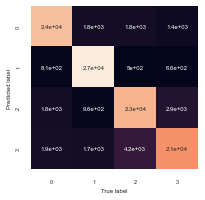

In [20]:
sns.set(font_scale=0.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    ### Classification Report
plot_conf_mat(y_test, y_preds)

In [21]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,1,2,3,4
Actual Labels,,,,
1,23561,1782,1804,1365
2,812,26554,501,655
3,1751,957,22799,2931
4,1926,1746,4151,20705


### Classification Report

In [22]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.84      0.83      0.83     28512
           2       0.86      0.93      0.89     28522
           3       0.78      0.80      0.79     28438
           4       0.81      0.73      0.76     28528

    accuracy                           0.82    114000
   macro avg       0.82      0.82      0.82    114000
weighted avg       0.82      0.82      0.82    114000

